In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Velocity model simulation
def CVM(Tmax,beta,sigma,v0,dt):
    T = np.arange(0,Tmax,dt)
    n = len(T)
    V = n*[0]
    V[0] = v0 # set the initial value if you want to start with a different value rather than 0
    dW = np.random.randn(n)*np.sqrt(dt) + 1j *np.random.randn(n)*np.sqrt(dt)# 2d motion 
    for i in range(1,n-1):
        V[i] = V[i-1] - beta*V[i-1] * dt  + sigma *dW[i]
    Z = np.cumsum(V)* dt
    return(Z)

In [3]:
n=CVM(1000,1,1,0,0.01).real
# dt = 0.01 

In [4]:
# Simulate the velocity model multiple times
# We look at lags 0,...,100
matrix_1 = np.zeros((10000,100))
for i in range(0,10000):
    n = CVM(1000,1,1,0,0.01).real
    matrix_1[i,:] = np.array(n[::100][10:110]) * np.array(n[::100][10])  

In [5]:
print(matrix_1.mean(axis=0))

[8.4819229  8.79836419 8.92296454 8.96616717 8.99234187 9.00390464
 9.01053773 9.04092141 9.06714328 9.07171931 9.07707782 9.05711131
 9.03481052 9.03417001 9.0423993  8.99781523 8.96535153 8.94022588
 8.91855256 8.89821538 8.87835155 8.88226064 8.89033061 8.88398194
 8.88193929 8.89238325 8.90548638 8.90136197 8.9027752  8.89651285
 8.85149743 8.81771624 8.806641   8.80307866 8.81217815 8.81169277
 8.82549863 8.84901005 8.85203359 8.85216581 8.85289475 8.85934018
 8.86005834 8.85147086 8.83538804 8.84790151 8.87335155 8.85500149
 8.86321272 8.86321073 8.8689452  8.86280213 8.86011616 8.83269933
 8.7997821  8.76700452 8.72067311 8.70496587 8.72057817 8.74633531
 8.74494672 8.71354829 8.71679907 8.7210683  8.71570314 8.69959766
 8.70680352 8.71562689 8.70307718 8.70267995 8.7047357  8.71250898
 8.71537154 8.69460596 8.70398956 8.69831291 8.67461329 8.68135706
 8.67975282 8.67517925 8.66466264 8.66956496 8.67042703 8.66150095
 8.64641021 8.64502473 8.63190876 8.63699995 8.65422305 8.6683

In [6]:
E_XY = matrix_1.mean(axis=0)
# We assume the mean of the process is 0

In [7]:
# Calculate the theoretical covariance
sigma = 1
a = 1 
s= 10
t = np.array(range(10,110))
theor_cov = np.zeros(len(t))
gamma= np.zeros(len(t))
for i in range(0,len(t)):
    gamma[i] = min(t[i],s) 

In [8]:
theor_cov= (0.5*sigma**2/a**3)*(2*np.exp(-a*gamma) - np.exp(-a*(t+gamma)) - np.exp(-a*np.abs(t-gamma)) + 2* np.exp(-a*t) +2*a*gamma -2 )

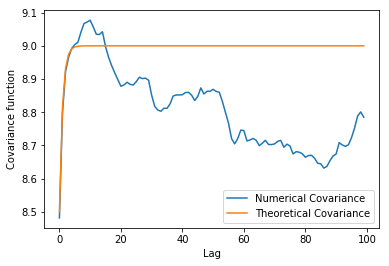

In [9]:
plt.plot(matrix_1.mean(axis=0),label="Numerical Covariance")
plt.plot(theor_cov ,label='Theoretical Covariance' )
plt.xlabel('Lag')
plt.ylabel('Covariance function')
plt.legend()
plt.show()